In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def frame_imshow_vis(img, tit = 'image'):
    cv2.imshow(tit, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def frame_plt_vis(img, fsize = (8, 8)):
    f, ax = plt.subplots(figsize=fsize)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')
    return ax

(2048, 1536)


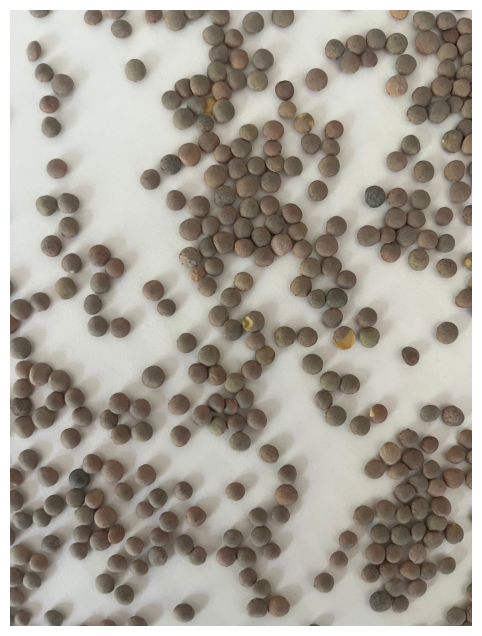

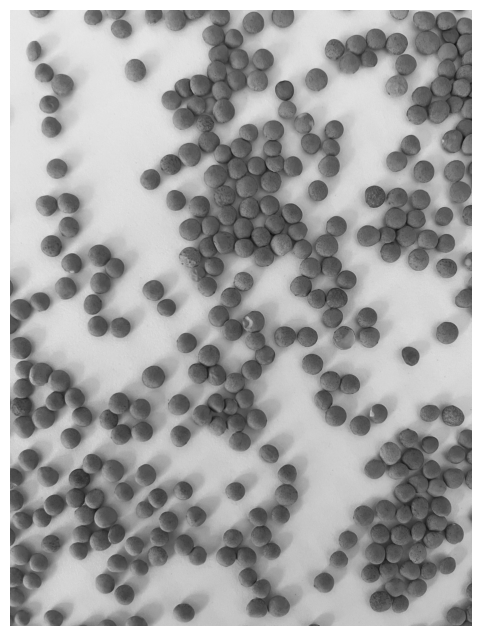

In [52]:
image = cv2.imread('images/lentejas.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

frame_plt_vis(image);
frame_plt_vis(gray);
print(gray.shape)


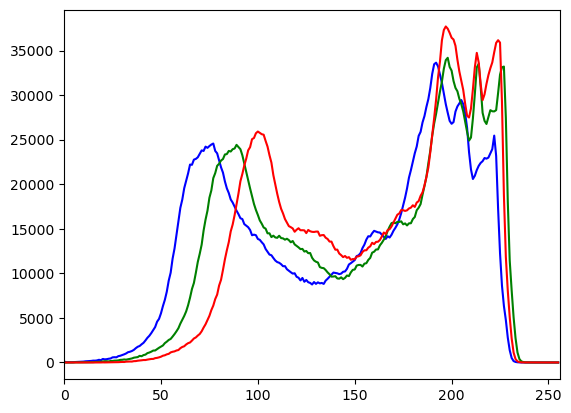

In [32]:
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])

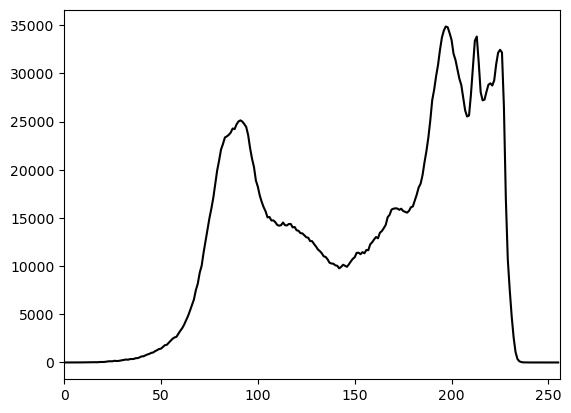

In [35]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.plot(hist, color='k')
plt.xlim([0, 256])
plt.show()

1568
439
2827.4333882308138


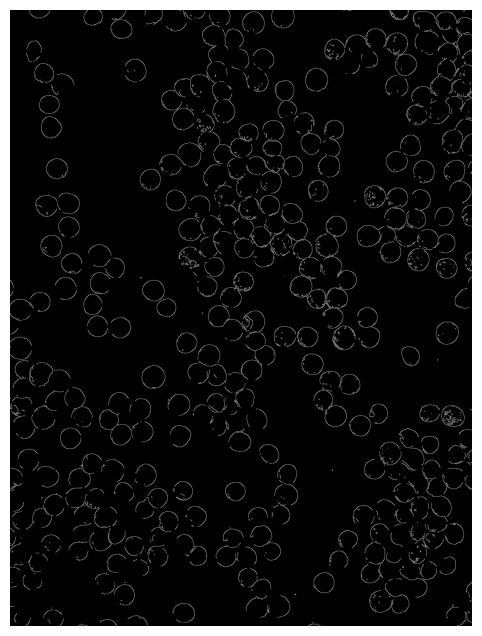

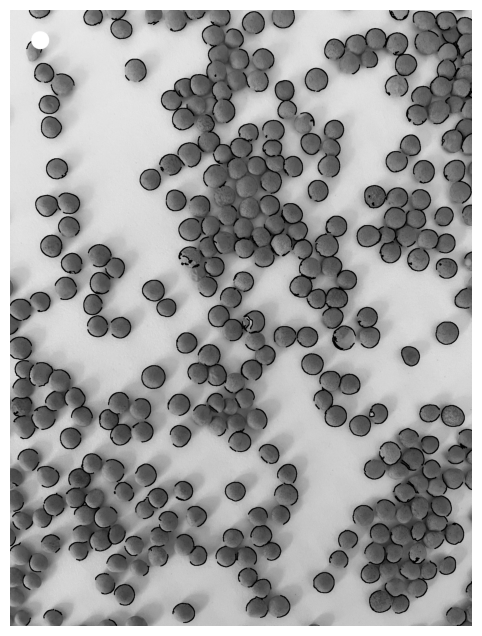

In [66]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blur = cv2.GaussianBlur(gray, (9, 9), 0)

canny = cv2.Canny(gray, 100, 160)

frame_plt_vis(canny);
contours, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
min_area = 10  # área mínima para considerar un contorno como una lenteja
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]
print(len(filtered_contours))


image_copy = gray.copy()
cv2.drawContours(image_copy, filtered_contours, -1, (0, 255, 0), 2)
cv2.circle(image_copy, [100,100], 30, (255, 87, 51), -1)
print(np.pi * 30**2)
frame_plt_vis(image_copy);

